<a href="https://colab.research.google.com/github/pbmakam/cryptopals/blob/master/Cryptopals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [the cryptopals crypto challenges](https://www.cryptopals.com/)


*   [Set 1: Basics](#set1)
*   Set 2: Block Crypto
*   Set 3: Block and Stream Crypto
*   Set 4: Stream crypto and randomness
*   Set 5: Diffie-Hellman and friends
*   Set 6: RSA and DSA
*   Set 7: Hashes
*   Set 8: Abstract Algebra

# Welcome to the challenges

We can't introduce these any better than [Maciej Ceglowski](https://blog.pinboard.in/2013/04/the_matasano_crypto_challenges/) did, so read that blog post first.

We've built a collection of 48 exercises that demonstrate attacks on real-world crypto.

This is a different way to learn about crypto than taking a class or reading a book. We give you problems to solve. They're derived from weaknesses in real-world systems and modern cryptographic constructions. We give you enough info to learn about the underlying crypto concepts yourself. When you're finished, you'll not only have learned a good deal about how cryptosystems are built, but you'll also understand how they're attacked.

## What Are The Rules?

There aren't any! For several years, we ran these challenges over email, and asked participants not to share their results. *The honor system worked beautifully!* But now we're ready to set aside the ceremony and just publish the challenges for everyone to work on.


## How Much Math Do I Need To Know?

If you have any trouble with the math in these problems, you should be able to find a local 9th grader to help you out. It turns out that many modern crypto attacks don't involve much hard math.

## How Much Crypto Do I Need To Know?

None. That's the point.

## So What Do I Need To Know?

You'll want to be able to code proficiently in any language. We've received submissions in C, C++, Python, Ruby, Perl, Visual Basic, X86 Assembly, Haskell, and Lisp. Surprise us with another language. Our friend Maciej says these challenges are a good way to learn a new language, so maybe now's the time to pick up Clojure or Rust.

## What Should I Expect?

Right now, we have eight sets. They get progressively harder. Again: these are based off real-world vulnerabilities. None of them are "puzzles". They're not designed to trip you up. Some of the attacks are clever, though, and if you're not familiar with crypto cleverness... well, you should like solving puzzles. An appreciation for early-90's MTV hip-hop can't hurt either.

## Can You Give Us A Long-Winded Indulgent Description For Why You'Ve Chosen To Do This?

*It turns out that we can.*

If you're not that familiar with crypto already, or if your familiarity comes mostly from things like Applied Cryptography, this fact may surprise you: most crypto is fatally broken. The systems we're relying on today that aren't known to be fatally broken are in a state of just waiting to be fatally broken. Nobody is sure that TLS 1.2 or SSH 2 or OTR are going to remain safe as designed.

The current state of crypto software security is similar to the state of software security in the 1990s. Specifically: until around 1995, it was not common knowledge that software built by humans might have trouble counting. As a result, nobody could size a buffer properly, and humanity incurred billions of dollars in cleanup after a decade and a half of emergency fixes for memory corruption vulnerabilities.

Counting is not a hard problem. But cryptography is. There are just a few things you can screw up to get the size of a buffer wrong. There are tens, probably hundreds, of obscure little things you can do to take a cryptosystem that should be secure even against an adversary with more CPU cores than there are atoms in the solar system, and make it solveable with a Perl script and 15 seconds. Don't take our word for it: do the challenges and you'll see.

People "know" this already, but they don't really know it in their gut, and we think the reason for that is that very few people actually know how to implement the best-known attacks. So, mail us, and we'll give you a tour of them.

## How do I start?

[Start here!](#basics)


## Who did this?

*    Thomas Ptacek (@tqbf)
*    Sean Devlin (@spdevlin)
*    Alex Balducci (@iamalexalright)
*    Marcin Wielgoszewski (@marcinw)

Cryptopals is maintained and expanded (from Set 8 on) by Sean Devlin, in conjunction with the [Cryptography Services Team](https://www.nccgroup.trust/us/our-services/security-consulting/cryptography-services/) at [NCC Group](https://www.nccgroup.trust/us/).

We could not possibly have done this without the help of several other people. Roughly in order of influence:

*    [Nate Lawson](http://www.rootlabs.com/) taught us virtually everything we know about cryptography.
*    [Trevor Perrin](http://trevp.net/) taught Nate some of that. I can tell you a pretty compelling story about how Trevor is the intellectual origin of every successful attack on TLS over the past 5 years.
*    Thai Duong and Juliano Rizzo are the godfathers of practical cryptographic software security. Several things in this challenge didn't make sense to us until after Thai and Juliano exploited them in mainstream software.

Legal

Individual exercise submissions are owned by their author, and may or may not be distributed under an open source license.

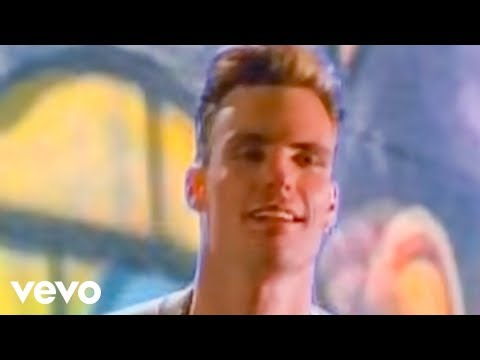

In [199]:
#@title Vanilla Ice { vertical-output: true }
#@markdown Setting the tempo with this early-90's MTV hip-hop song
from IPython.display import YouTubeVideo
YouTubeVideo('rog8ou-ZepE', width=600, height=400)

## Crypto Challenge Set 1 <a name="set1"></a>

This is the **qualifying set**. We picked the exercises in it to ramp developers up gradually into coding cryptography, but also to verify that we were working with people who were ready to write code.

This set is **relatively easy**. With one exception, most of these exercises should take only a couple minutes. But don't beat yourself up if it takes longer than that. It took Alex two weeks to get through the set!

If you've written any crypto code in the past, you're going to feel like skipping a lot of this. **Don't skip them**. At least two of them (we won't say which) are important stepping stones to later attacks.

*   [Convert hex to base64](#ex1) 
*   [Fixed XOR](#ex2)
*   [Single-byte XOR cipher](#ex3)
*   [Detect single-character XOR](#ex4)
*   [Implement repeating-key XOR](#ex5)
*   [Break repeating-key XOR](#ex6)
*   [AES in ECB mode](#ex7)
*   [Detect AES in ECB mode](#ex8)

### Convert hex to base64 <a name="ex1"></a>

The string:


In [0]:
inp = '49276d206b696c6c696e6720796f757220627261696e206c696b65206120706f69736f6e6f7573206d757368726f6f6d'

Should produce:

In [0]:
exp = 'SSdtIGtpbGxpbmcgeW91ciBicmFpbiBsaWtlIGEgcG9pc29ub3VzIG11c2hyb29t'

So go ahead and make that happen. You'll need to use this code for the rest of the exercises.

code here

In [0]:
from base64 import b64encode
def hex_to_base64(dat):
  raw = bytes.fromhex(dat)
  print(raw.decode('utf-8'))
  return b64encode(raw).decode('utf-8')

test here

In [203]:
got = hex_to_base64(inp)
assert got == exp, "got {} != exp {}".format(got, exp)

I'm killing your brain like a poisonous mushroom


```
```
**Cryptopals Rule**
***
```
Always operate on raw bytes, never on encoded strings. Only use hex and base64 for pretty-printing. 
```





### Fixed XOR<a name="ex2"></a>

Write a function that takes two equal-length buffers and produces their XOR combination.

If your function works properly, then when you feed it the string: 

In [0]:
inp1 = '1c0111001f010100061a024b53535009181c'

... after hex decoding, and when XOR'd against:

In [0]:
inp2 = '686974207468652062756c6c277320657965'

... should produce: 

In [0]:
exp = '746865206b696420646f6e277420706c6179'

code here

In [0]:
def fixed_xor(buf1, buf2):
  if len(buf1) > len(buf2):
    buf1 = buf1[:len(buf2)]
  assert len(buf1) == len(buf2), "buf1 {} != buf2 {}"\
    .format(len(buf1), len(buf2))
  buf1_decoded = bytes.fromhex(buf1)
  buf2_decoded = bytes.fromhex(buf2)
  return bytes([a^b for (a, b) in zip(buf1_decoded, buf2_decoded)])

test here

In [208]:
got = fixed_xor(inp1, inp2)
assert got == bytes.fromhex(exp), "got {} != exp {}".format(got, exp)
print (got.decode('utf-8'))

the kid don't play


### Single-byte XOR cipher <a name="ex3"></a>

The hex encoded string:

In [0]:
inp = '1b37373331363f78151b7f2b783431333d78397828372d363c78373e783a393b3736'

 ... has been XOR'd against a single character. Find the key, decrypt the message.

You can do this by hand. But don't: write code to do it for you.

How? Devise some method for "scoring" a piece of English plaintext. Character frequency is a good metric. Evaluate each output and choose the one with the best score.
```
```
**Achievement Unlocked**
***
```
You now have our permission to make "ETAOIN SHRDLU" jokes on Twitter. 
```

### Detect single-character XOR <a name="ex4"></a>

### Implement repeating-key XOR <a name="ex5"></a>

### Break repeating-key XOR <a name="ex6"></a>

### AES in ECB mode <a name="ex7"></a>

### Detect AES in ECB mode <a name="ex8"></a>